## Pre Processing

In [264]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import keras
import math
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import sys
import io
import json
import joblib

In [230]:
orig=pd.read_csv('dataset.csv')

In [231]:
orig = orig.replace(' ',np.nan)

In [232]:
orig.head()

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,specifications,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,NaN,https://rukminim1.flixcart.com/image/612/612/x...
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g,NaN,https://rukminim1.flixcart.com/image/612/612/k...
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...,NaN,https://rukminim1.flixcart.com/image/612/612/j...


In [233]:
orig.isna().sum()

category_1            0
category_2            0
category_3            0
title                18
product_rating       80
selling_price        28
mrp                 375
seller_name         216
seller_rating       214
description        7020
highlights         5481
specifications    12041
image_links           0
dtype: int64

In [234]:
orig = orig.drop(['highlights','specifications','mrp','image_links'],axis=1)

In [235]:
dataset = orig.dropna().reset_index(drop = True)

In [236]:
for i in dataset.selling_price.index:
    k = ''
    for j in dataset.selling_price[i]:
        if j==',' or j == '₹':
            continue
        k=k+j
    dataset.selling_price[i]=int(k)
        

C:\Users\priya\AppData\Local\Temp\ipykernel_11880\4294518981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.selling_price[i]=int(k)


In [237]:
dataset.selling_price = dataset.selling_price.astype(int)

In [238]:
dataset.product_rating = dataset.product_rating.astype(float)
dataset.seller_rating = dataset.seller_rating.astype(float)

In [239]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      4941 non-null   object 
 1   category_2      4941 non-null   object 
 2   category_3      4941 non-null   object 
 3   title           4941 non-null   object 
 4   product_rating  4941 non-null   float64
 5   selling_price   4941 non-null   int32  
 6   seller_name     4941 non-null   object 
 7   seller_rating   4941 non-null   float64
 8   description     4941 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 328.2+ KB


In [240]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [241]:
dataset.category_1=le1.fit_transform(dataset.category_1)
dataset.category_2=le2.fit_transform(dataset.category_2)
dataset.category_3=le3.fit_transform(dataset.category_3)
#le.classes_

In [242]:
le1.classes_

array(['Bady and Kids', 'Electronics', 'Home and Furniture', "Men's wear",
       'Sports, Books and More', "Women's wear"], dtype=object)

In [243]:
le2.classes_

array(['Auto Accessories', 'Baby Boy Clothing', 'Baby Care',
       'Baby Girl Clothing', 'Beauty and Grooming', 'Bed Room Furniture',
       'Books ', 'Boys Clothing', 'Camera Accessories', 'Cameras',
       'Cleaning Supplies', 'Computer Accessories',
       'Computer Peripherals', 'DIY Furniture', 'Desktop PCs',
       'Ethnic Bottoms', 'Ethnic Wear', 'Exercise Fitness ',
       'Festive Decor and Gifts', 'Food Essentials', 'Furnishing',
       'Gaming', 'Gaming and Accessories', 'Girls Clothing',
       'Health &Nutrition ', 'Health Care Appliances', 'Home Décor',
       'Home Improvement', 'Home Lighting',
       'Industrial &Scientific tools ', 'Kids Footwear ',
       'Kitchen ,Cookware and Serveware', 'Kitchen Storage', 'Laptops',
       'Lingerie and sleepware', 'Living Room Furniture',
       'Medical Supplies', "Men's Grooming", 'Mobile Accessories',
       'Network Components', 'Office and Study Furniture',
       'Personal Care Appliances', 'Pet Supplies',
       'Raincoat

In [244]:
le3.classes_

array(['Ab Exercisers ', 'Academics ', 'Action Figures ', 'Apple Ipads',
       'Ayurvedic Supplements ', 'Baby Bath ,Hair and Skin Care ',
       'Baby Bathing Accessories ', 'Baby Bedding',
       'Baby Cleaners and Detergents ',
       'Baby Feeding Bottle and Accessories ',
       'Baby Feeding Utensils and Accessories', 'Baby Food ',
       'Baby Gear ', 'Baby Gift Sets and Combo ', 'Baby Grooming ',
       'Baby Medical and Health Care ', 'Baby Oral Care ',
       'Baby Proofing and Safety ', 'Badminton ', 'Barware ',
       'Bath Towels ', 'Bath and Spa', 'Bathroom and Kitchen Fittings ',
       'Bean Bags ', 'Beard Care and Grooming ', 'Beds ', 'Bedsheets ',
       'Blankets ', 'Bluetooth Speakers', 'Board Games ', 'Bp Monitors',
       'Bulbs', 'Calculators ', 'Camping  and Hiking ',
       'Car Audio /Video ', 'Car Mobile Accessories ', 'Card Holders ',
       'Cardio Equipment ', 'Casseroles ', 'Cats ', 'Ceiling Lamp ',
       'Chocolates ', 'Cleaning Supplies', 'Clocks ', '

In [245]:
dataset = dataset.drop(['seller_name'],axis = 1)

In [246]:
all_word = np.hstack([dataset.title.str.lower(),dataset.description.str.lower()])

In [247]:
tokenizer = Tokenizer(oov_token = 0)

In [248]:
tokenizer.fit_on_texts(all_word)

In [249]:
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [250]:
dataset.title = tokenizer.texts_to_sequences(dataset.title.str.lower())
dataset.description = tokenizer.texts_to_sequences(dataset.description.str.lower())

<AxesSubplot:>

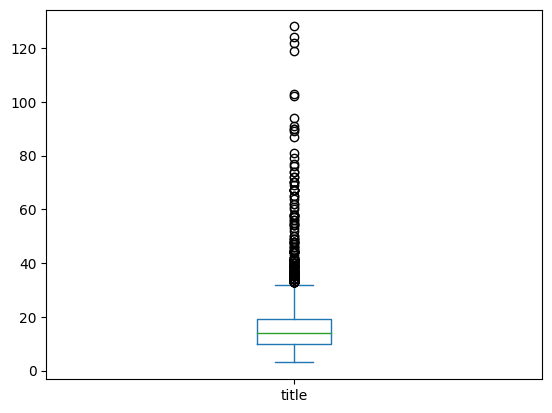

In [251]:
dataset.title.apply(lambda x:len(x)).plot(kind = 'box')

<AxesSubplot:>

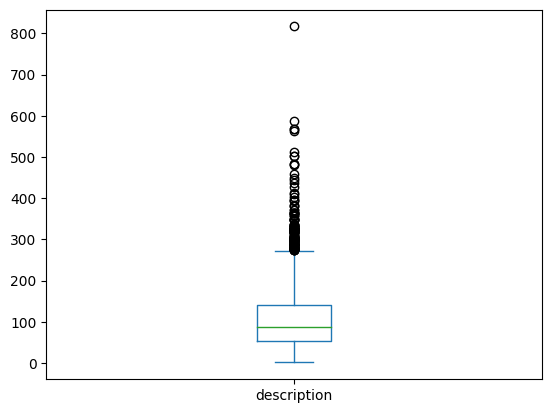

In [252]:
dataset.description.apply(lambda x:len(x)).plot(kind = 'box')

In [253]:
max_title = 32
max_description = 128

In [254]:
dataset.head()

,category_1,category_2,category_3,title,product_rating,selling_price,seller_rating,description
0,4,48,47,"[15086, 1336, 1320, 4226, 11613, 1320, 9856, 6...",4.4,152,4.4,"[112, 78, 112, 344, 1336, 1320, 5069, 1033]"
1,4,48,47,"[7668, 11614, 235, 72, 252, 783, 5235, 1336, 1...",3.4,329,4.7,"[3, 7668, 5235, 4952, 1336, 1321, 36, 292, 61,..."
2,4,48,47,"[3360, 78, 1336, 1321, 335, 311, 11615, 222, 6...",4.1,369,4.1,"[3360, 78, 1336, 1198, 11615, 1321, 153, 75, 5..."
3,4,48,47,"[4447, 235, 72, 409, 366, 120, 1336, 1321, 5, ...",4.0,249,4.8,"[4447, 366, 120, 235, 72, 1336, 1321, 168, 5, ..."
4,4,48,47,"[4447, 3606, 1336, 1321, 72, 33, 5, 422, 1301,...",3.9,249,4.8,"[4447, 3606, 1336, 1321, 72, 33, 5, 422, 1301,..."


In [255]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5
from sklearn.metrics import mean_absolute_error as mae,mean_absolute_percentage_error as mape

## sep_emb_model

In [126]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

In [127]:
x_title = pad_sequences(dataset.title,maxlen = max_title)
x_description = pad_sequences(dataset.description,maxlen = max_description)
cat1 = dataset.category_1.to_numpy()
cat2 = dataset.category_2.to_numpy()
cat3 = dataset.category_3.to_numpy()

In [128]:
feed_data = {
    'name':x_title,
    'item_desc':x_description,
    'category_1':cat1,
    'category_2':cat2,
    'category_3':cat3
}

In [129]:
feed_data

{'name': array([[    0,     0,     0, ...,  1265,  4805,  1145],
        [  971,   148,   935, ...,     8, 14241,   642],
        [    5,   491,   262, ...,    94,   431,  1425],
        ...,
        [  529,   138,   121, ...,    12,    57,   577],
        [ 2790,    75,    64, ..., 23878,   130,   583],
        [  134,   144,  5772, ...,     2,   540,    50]]),
 'item_desc': array([[    0,     0,     0, ...,  1265,  4805,  1145],
        [    0,     0,     0, ...,     8, 14241,   642],
        [    0,     0,     0, ...,    94,   431,  1425],
        ...,
        [    0,     0,     0, ...,    12,    57,   577],
        [    0,     0,     0, ..., 23878,   130,   583],
        [    0,     0,     0, ...,     2,   540,    50]]),
 'category_1': array([4, 4, 4, ..., 2, 2, 2]),
 'category_2': array([48, 48, 48, ..., 42, 42, 42]),
 'category_3': array([47, 47, 47, ..., 71, 71, 71])}

In [130]:
max_name = np.max(x_title)+1
max_desp = np.max(x_description)+1
max_cat1=np.max(cat1)+1
max_cat2=np.max(cat2)+1
max_cat3=np.max(cat3)+1

In [131]:
y = dataset.selling_price.to_numpy()

In [132]:
#shrinking y better look of mae, mse
y = np.log(y+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
y = target_scaler.fit_transform(y.reshape(-1,1))

In [133]:
def get_model():
    #params
    dr_r = 0.1
    
    #Inputs
    name = Input(shape=[x_title.shape[1]], name="name")
    item_desc = Input(shape=[x_description.shape[1]], name="item_desc")
    category_1 = Input(shape=[1], name="category_1")
    category_2 = Input(shape=[1], name="category_2")
    category_3 = Input(shape=[1], name = "category_3")
    
    #Embeddings layers
    emb_name = Embedding(max_name, 32)(name)
    emb_item_desc = Embedding(max_desp, 64)(item_desc)
    emb_category_1 = Dense(8)(category_1)
    emb_category_2 = Dense(8)(category_2)
    emb_category_3 = Dense(8)(category_3)

    
    #rnn layer
    rnn_layer1 = GRU(16) (emb_item_desc)
    rnn_layer2 = GRU(8) (emb_name)
    
    #main layer
    main_l = concatenate([
           Flatten() (category_1)
         , Flatten() (category_2)
         , Flatten() (category_3)
         , rnn_layer1
         , rnn_layer2
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    #output
    output = Dense(1, activation="linear") (main_l)
    
    #model
    model = Model([name,item_desc,category_1,category_2,category_3], output) #name, item_desc, category_1, category_2, category_3
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="mse", optimizer=opt, metrics=["mae"])
    
    return model

    
model_sep = get_model()
model_sep.summary()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (733490949.py, line 41)

In [33]:
epochs = 20
model_sep.fit(feed_data,y,epochs = epochs)

Epoch 1/20
155/155 [==============================] - 24s 102ms/step - loss: 350.2938
Epoch 2/20
155/155 [==============================] - 13s 84ms/step - loss: 2.1335
Epoch 3/20
155/155 [==============================] - 15s 98ms/step - loss: 1.1822
Epoch 4/20
155/155 [==============================] - 16s 104ms/step - loss: 0.7096
Epoch 5/20
155/155 [==============================] - 16s 100ms/step - loss: 0.4560
Epoch 6/20
155/155 [==============================] - 14s 91ms/step - loss: 0.3264
Epoch 7/20
155/155 [==============================] - 17s 110ms/step - loss: 0.2667
Epoch 8/20
155/155 [==============================] - 17s 108ms/step - loss: 0.2185
Epoch 9/20
155/155 [==============================] - 17s 110ms/step - loss: 0.1792
Epoch 10/20
155/155 [==============================] - 17s 109ms/step - loss: 0.1577
Epoch 11/20
155/155 [==============================] - 17s 110ms/step - loss: 0.1396
Epoch 12/20
155/155 [==============================] - 17s 109ms/step - los

In [34]:
dataset.selling_price.describe()

count      4941.000000
mean       1732.453957
std        6047.012503
min          51.000000
25%         259.000000
50%         415.000000
75%         852.000000
max      115000.000000
Name: selling_price, dtype: float64

In [35]:
y_pred = model_sep.predict(feed_data)

155/155 [==============================] - 5s 20ms/step


In [36]:
y_pred = target_scaler.inverse_transform(y_pred)
y_pred = np.exp(y_pred)-1

In [39]:
print(rmsle(dataset.selling_price, y_pred))
print(mae(dataset.selling_price,y_pred))
print(mape(dataset.selling_price,y_pred))

0.35990745207011127
582.4389363304127
0.2765700356066353


In [40]:
model_sep.save('seperate_embed_rmlse_0.359_mae_582_mape_.0.276.h5')

## FastText

In [256]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

In [257]:
x_title = pad_sequences(dataset.title,maxlen = max_title)
x_description = pad_sequences(dataset.description,maxlen = max_description)
cat1 = dataset.category_1.to_numpy()
cat2 = dataset.category_2.to_numpy()
cat3 = dataset.category_3.to_numpy()
feed_data = {
    'name':x_title,
    'item_desc':x_description,
    'category_1':cat1,
    'category_2':cat2,
    'category_3':cat3
}

In [258]:
feed_data['name']

array([[   0,    0,    0, ..., 1336, 5234,  344],
       [   0,    0,    0, ...,   21,   27,  238],
       [   0,    0,    0, ...,   42,    6,   75],
       ...,
       [   0,    0,    0, ...,   53,   21,  238],
       [   0,    0,    0, ..., 3363, 5389,   79],
       [   0,    0,    0, ..., 3363,  394,   79]])

In [259]:
max_name = np.max(x_title)+1
max_desp = np.max(x_description)+1
max_cat1 = np.max(cat1)+1
max_cat2=np.max(cat2)+1
max_cat3=np.max(cat3)+1
max_text = max(max_name,max_desp)

In [260]:
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D

In [261]:
def get_model():
    #params
    dr_r = 0.1
    
    #Inputs
    name = Input(shape=[x_title.shape[1]], name="name")
    item_desc = Input(shape=[x_description.shape[1]], name="item_desc")
    category1 = Input(shape=[1], name="category_1")
    category2 = Input(shape=[1], name="category_2")
    category3 = Input(shape=[1], name="category_3")
    
    #Embeddings layers

    shared_embedding = Embedding(max_text, 50)    
    emb_name = shared_embedding (name)
    emb_item_desc = shared_embedding (item_desc)
    
    val=10
    emb_category1 = Flatten() ( Embedding(max_cat1, val)(category1) )
    emb_category2 = Flatten() ( Embedding(max_cat2, val)(category2) )
    emb_category3 = Flatten() ( Embedding(max_cat3, val)(category3) )
    
    emb_name = GlobalAveragePooling1D( name='output_name_max' )(emb_name)
    emb_item_desc = GlobalAveragePooling1D(name='output_item_max' )(emb_item_desc)

    x = concatenate([emb_name,emb_item_desc,emb_category1,emb_category2,emb_category3])
    x = BatchNormalization()(x)
    x = Dense(1024)(x)
    x = Activation('relu')(x)

    output = Dense(1, activation="linear") (x)
    model = Model([name,item_desc,category1,category2,category3], output)
    optimizer = keras.optimizers.Adam(learning_rate=0.02)
    model.compile(loss="mse", optimizer=optimizer)

    return model
    
model_share = get_model()
model_share.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 name (InputLayer)              [(None, 32)]         0           []                               
                                                                                                  
 item_desc (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 category_1 (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 category_2 (InputLayer)        [(None, 1)]          0           []                               
                                                                                            

In [262]:
#shrinking y better look of mae, mse
y = dataset.selling_price.to_numpy()
y = np.log(y+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
y = target_scaler.fit_transform(y.reshape(-1,1))

In [268]:
joblib.dump(target_scaler, 'scaler.gz')

['scaler.gz']

In [263]:
epochs = 20
model_share.fit(feed_data,y,epochs = epochs)

Epoch 1/20
155/155 [==============================] - 3s 14ms/step - loss: 0.4370
Epoch 2/20
155/155 [==============================] - 2s 14ms/step - loss: 0.0400
Epoch 3/20
155/155 [==============================] - 2s 14ms/step - loss: 0.0242
Epoch 4/20
155/155 [==============================] - 3s 16ms/step - loss: 0.0153
Epoch 5/20
155/155 [==============================] - 2s 15ms/step - loss: 0.0114
Epoch 6/20
155/155 [==============================] - 2s 15ms/step - loss: 0.0088
Epoch 7/20
155/155 [==============================] - 2s 16ms/step - loss: 0.0094
Epoch 8/20
155/155 [==============================] - 3s 17ms/step - loss: 0.0086
Epoch 9/20
155/155 [==============================] - 2s 15ms/step - loss: 0.0077
Epoch 10/20
155/155 [==============================] - 3s 17ms/step - loss: 0.0081
Epoch 11/20
155/155 [==============================] - 3s 17ms/step - loss: 0.0078
Epoch 12/20
155/155 [==============================] - 2s 16ms/step - loss: 0.0080
Epoch 13/20
1

In [265]:
y_pred = model_share.predict(feed_data)

155/155 [==============================] - 0s 2ms/step


In [266]:
y_pred = target_scaler.inverse_transform(y_pred)
y_pred = np.exp(y_pred)-1

In [267]:
print(rmsle(dataset.selling_price, y_pred))
print(mae(dataset.selling_price,y_pred))
print(mape(dataset.selling_price,y_pred))

0.28933769036508517
782.8001974318535
0.279048781860297


In [269]:
model_share.save('fasttext_rmlse_0.28_mae_782_mape_0.27.h5')

# Category 1 seperate check

In [273]:
data1 = dataset.copy()

In [274]:
data1.category_1 = le1.inverse_transform(data1.category_1)

<AxesSubplot:>

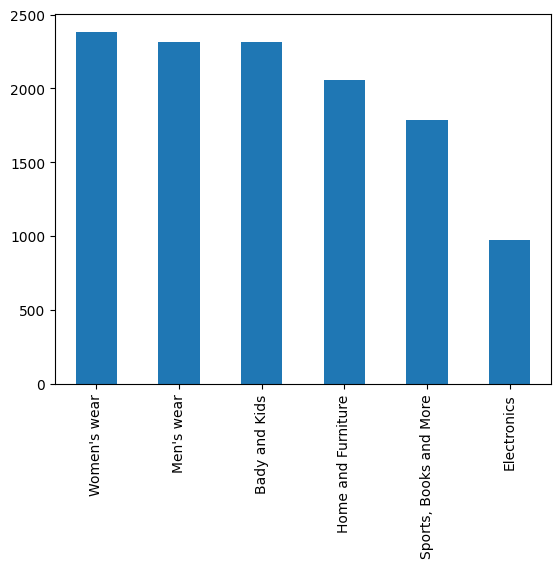

In [359]:
data1.category_1.value_counts().plot(kind = 'bar')

In [360]:
types = data1.category_1.unique()

In [361]:
def get_model():
    #params
    dr_r = 0.1
    
    #Inputs
    name = Input(shape=[x_title.shape[1]], name="name")
    item_desc = Input(shape=[x_description.shape[1]], name="item_desc")
    category2 = Input(shape=[1], name="category_2")
    category3 = Input(shape=[1], name="category_3")
    
    #Embeddings layers

    shared_embedding = Embedding(max_text, 50)    
    emb_name = shared_embedding (name)
    emb_item_desc = shared_embedding (item_desc)
    
    val=10
    emb_category2 = Flatten() ( Embedding(max_cat2, val)(category2) )
    emb_category3 = Flatten() ( Embedding(max_cat3, val)(category3) )
    
    emb_name = GlobalAveragePooling1D( name='output_name_max' )(emb_name)
    emb_item_desc = GlobalAveragePooling1D(name='output_item_max' )(emb_item_desc)

    x = concatenate([emb_name,emb_item_desc,emb_category2,emb_category3])
    x = BatchNormalization()(x)
    x = Dense(1024)(x)
    x = Activation('relu')(x)

    output = Dense(1, activation="linear") (x)
    model = Model([name,item_desc,category2,category3], output)
    optimizer = keras.optimizers.Adam(learning_rate=0.02)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae","mape", rmsle_cust])

    return model
    
model = get_model()
model.summary()

Model: "model_68"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 name (InputLayer)              [(None, 32)]         0           []                               
                                                                                                  
 item_desc (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 category_2 (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 category_3 (InputLayer)        [(None, 1)]          0           []                               
                                                                                           

In [362]:
types

array(['Sports, Books and More', 'Electronics', "Men's wear",
       "Women's wear", 'Bady and Kids', 'Home and Furniture'],
      dtype=object)

In [363]:
results = []

In [364]:
for cat in types:
    try:
        data = data1[data1.category_1==cat].reset_index(drop = True)
        model = get_model()
        max_title = 32
        max_description = 128
        x_title = pad_sequences(data.title,maxlen = max_title)
        x_description = pad_sequences(data.description,maxlen = max_description)
        cat2 = data.category_2.to_numpy()
        cat3 = data.category_3.to_numpy()
        feed_data = {
            'name':x_title,
            'item_desc':x_description,
            'category_2':cat2,
            'category_3':cat3
        }
        max_name = np.max(x_title)+1
        max_desp = np.max(x_description)+1
        max_cat2=np.max(cat2)+1
        max_cat3=np.max(cat3)+1
        y = data.selling_price.to_numpy()
        y = np.log(y+1)
        target_scaler = MinMaxScaler(feature_range=(-1, 1))
        y = target_scaler.fit_transform(y.reshape(-1,1))
        model.fit(feed_data,y,epochs = epochs)
        y_pred = model.predict(feed_data)
        y_pred = target_scaler.inverse_transform(y_pred)
        y_pred = np.exp(y_pred)-1
        rmlse_val = rmsle(data.selling_price, y_pred)
        mae_val = mae(data.selling_price,y_pred)
        mape_val = mape(data.selling_price,y_pred)
        result = {
            'category':cat,
            'rmlse':rmlse_val,
            'mae':mae_val,
            'mape':mape_val,
            'Number_of_items':data.shape[0],
            'target_mean':data.selling_price.mean(),
            'target_std':data.selling_price.std(),
            'target_min':data.selling_price.min(),
            'target_max':data.selling_price.max(),
        }
        results.append(result)
        print(f'{cat} done')
    except:
        data = data1[data1.category_1==cat].reset_index(drop = True)
        model = get_model()
        max_title = 32
        max_description = 128
        x_title = pad_sequences(data.title,maxlen = max_title)
        x_description = pad_sequences(data.description,maxlen = max_description)
        cat2 = data.category_2.to_numpy()
        cat3 = data.category_3.to_numpy()
        feed_data = {
            'name':x_title,
            'item_desc':x_description,
            'category_2':cat2,
            'category_3':cat3
        }
        max_name = np.max(x_title)+1
        max_desp = np.max(x_description)+1
        max_cat2=np.max(cat2)+1
        max_cat3=np.max(cat3)+1
        y = data.selling_price.to_numpy()
        y = np.log(y+1)
        target_scaler = MinMaxScaler(feature_range=(-1, 1))
        y = target_scaler.fit_transform(y.reshape(-1,1))
        model.fit(feed_data,y,epochs = epochs)
        y_pred = model.predict(feed_data)
        y_pred = target_scaler.inverse_transform(y_pred)
        y_pred = np.exp(y_pred)-1
        rmlse_val = rmsle(data.selling_price, y_pred)
        mae_val = mae(data.selling_price,y_pred)
        mape_val = mape(data.selling_price,y_pred)
        result = {
            'category':cat,
            'rmlse':rmlse_val,
            'mae':mae_val,
            'mape':mape_val,
            'Number_of_items':data.shape[0],
            'target_mean':data.selling_price.mean(),
            'target_std':data.selling_price.std(),
            'target_min':data.selling_price.min(),
            'target_max':data.selling_price.max(),
        }
        results.append(result)
        print(f'{cat} done')

Epoch 1/20
56/56 [==============================] - 2s 16ms/step - loss: 1.0105 - mae: 0.6428 - mape: 861.0957 - rmsle_cust: 0.1728
Epoch 2/20
56/56 [==============================] - 1s 16ms/step - loss: 0.0832 - mae: 0.2001 - mape: 307.7478 - rmsle_cust: 0.0472
Epoch 3/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0259 - mae: 0.1163 - mape: 170.1295 - rmsle_cust: 0.0266
Epoch 4/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0185 - mae: 0.0952 - mape: 144.9015 - rmsle_cust: 0.0209
Epoch 5/20
56/56 [==============================] - 1s 16ms/step - loss: 0.0108 - mae: 0.0749 - mape: 136.0539 - rmsle_cust: 0.0179
Epoch 6/20
56/56 [==============================] - 1s 16ms/step - loss: 0.0086 - mae: 0.0670 - mape: 101.1302 - rmsle_cust: 0.0151
Epoch 7/20
56/56 [==============================] - 1s 16ms/step - loss: 0.0112 - mae: 0.0744 - mape: 92.6844 - rmsle_cust: 0.0182
Epoch 8/20
56/56 [==============================] - 1s 15ms/step - loss: 0.00

In [365]:
cat1_result = pd.DataFrame(results)

In [366]:
cat1_result

,category,rmlse,mae,mape,Number_of_items,target_mean,target_std,target_min,target_max
0,"Sports, Books and More",0.157889,318.836903,0.110211,1787,1484.177392,5159.982219,10,69999
1,Electronics,0.483879,3930.636223,0.455538,971,7121.487127,22704.352918,126,300490
2,Men's wear,0.186453,241.497580,0.137318,2314,894.427831,1335.983768,65,16495
3,Women's wear,0.161883,340.599201,0.109079,2384,1205.623742,5258.657098,74,85360
4,Bady and Kids,0.166389,97.845820,0.131839,2313,502.440986,1150.534273,62,45599
5,Home and Furniture,0.300718,1692.553927,0.246900,2056,2213.756323,5103.966683,59,49999


In [367]:
base = {
    'category':'base',
    'rmlse':0.2260064321150214,
    'mae':720.8442225407019,
    'mape':0.1594965731165146,
    'Number_of_items':dataset.shape[0],
    'target_mean':dataset.selling_price.mean(),
    'target_std':dataset.selling_price.std(),
    'target_min':dataset.selling_price.min(),
    'target_max':dataset.selling_price.max(),
}

In [368]:
cat1_result.append(base,ignore_index = True)

C:\Users\priya\AppData\Local\Temp\ipykernel_16336\2857042389.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat1_result.append(base,ignore_index = True)


,category,rmlse,mae,mape,Number_of_items,target_mean,target_std,target_min,target_max
0,"Sports, Books and More",0.157889,318.836903,0.110211,1787,1484.177392,5159.982219,10,69999
1,Electronics,0.483879,3930.636223,0.455538,971,7121.487127,22704.352918,126,300490
2,Men's wear,0.186453,241.497580,0.137318,2314,894.427831,1335.983768,65,16495
3,Women's wear,0.161883,340.599201,0.109079,2384,1205.623742,5258.657098,74,85360
4,Bady and Kids,0.166389,97.845820,0.131839,2313,502.440986,1150.534273,62,45599
5,Home and Furniture,0.300718,1692.553927,0.246900,2056,2213.756323,5103.966683,59,49999
6,base,0.226006,720.844223,0.159497,11825,1710.336660,7742.270410,10,300490


In [356]:
cat1_result.to_csv('category_1_results.csv')

In [369]:
cat1_result.to_csv('2category_1_results.csv')